In [1]:
import keras
import fastai
from fastai.vision import *

import pandas as pd
import numpy as np

import os
import shutil
from pathlib import Path
import tarfile

import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.


In [20]:
path_raw_data = Path('../data/kaggle/sample/')
files = os.listdir(path_raw_data)
files

['sample_labels.csv', 'sample.zip', 'images']

In [21]:
path_data = path_raw_data/'images'
verify_images(path_data, n_channels=1)
img_files = os.listdir(path_data)

Image ../data/kaggle/sample/images/00029745_001.png has 4 instead of 1 channels
Image ../data/kaggle/sample/images/00013360_000.png has 4 instead of 1 channels
Image ../data/kaggle/sample/images/00004395_000.png has 4 instead of 1 channels
Image ../data/kaggle/sample/images/00005496_000.png has 4 instead of 1 channels
Image ../data/kaggle/sample/images/00002720_004.png has 4 instead of 1 channels
Image ../data/kaggle/sample/images/00000084_000.png has 4 instead of 1 channels
Image ../data/kaggle/sample/images/00007258_000.png has 4 instead of 1 channels
Image ../data/kaggle/sample/images/00006843_000.png has 4 instead of 1 channels
Image ../data/kaggle/sample/images/00014223_009.png has 4 instead of 1 channels
Image ../data/kaggle/sample/images/00001260_000.png has 4 instead of 1 channels
Image ../data/kaggle/sample/images/00002543_000.png has 4 instead of 1 channels
Image ../data/kaggle/sample/images/00012139_000.png has 4 instead of 1 channels
Image ../data/kaggle/sample/images/00002

In [24]:
img_files[:5], len(img_files)

(['00021006_018.png',
  '00011485_004.png',
  '00019484_005.png',
  '00001301_021.png',
  '00010120_020.png'],
 5584)

In [25]:
df_labels = pd.read_csv(path_raw_data/"sample_labels.csv")
print(df_labels.head(), df_labels.shape)
df_labels = df_labels.loc[df_labels['Image Index'].isin(img_files)]
print(df_labels.shape)

        Image Index                                     Finding Labels  \
0  00000013_005.png  Emphysema|Infiltration|Pleural_Thickening|Pneu...   
1  00000013_026.png                             Cardiomegaly|Emphysema   
2  00000017_001.png                                         No Finding   
3  00000030_001.png                                        Atelectasis   
4  00000032_001.png                        Cardiomegaly|Edema|Effusion   

   Follow-up #  Patient ID Patient Age Patient Gender View Position  \
0            5          13        060Y              M            AP   
1           26          13        057Y              M            AP   
2            1          17        077Y              M            AP   
3            1          30        079Y              M            PA   
4            1          32        055Y              F            AP   

   OriginalImageWidth  OriginalImageHeight  OriginalImagePixelSpacing_x  \
0                3056                 2544           

In [26]:
tfms = get_transforms(do_flip=False, flip_vert=False, max_rotate=0.02)

basic_block = (ImageItemList
            .from_df(df_labels,
                     path=path_data)
            .random_split_by_pct(0.2)
            .label_from_df(label_delim='|'))

db_xrays = (basic_block
            .transform(tfms, 
                       size=64) 
            .databunch(bs=32))

db_xrays.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (4467 items)
x: ImageItemList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: MultiCategoryList
Emphysema;Infiltration;Pleural_Thickening;Pneumothorax,Cardiomegaly;Emphysema,Atelectasis,Cardiomegaly;Edema;Effusion,Consolidation;Mass
Path: ../data/kaggle/sample/images;

Valid: LabelList (1116 items)
x: ImageItemList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: MultiCategoryList
No Finding,No Finding,No Finding,Atelectasis,Effusion;Infiltration
Path: ../data/kaggle/sample/images;

Test: None

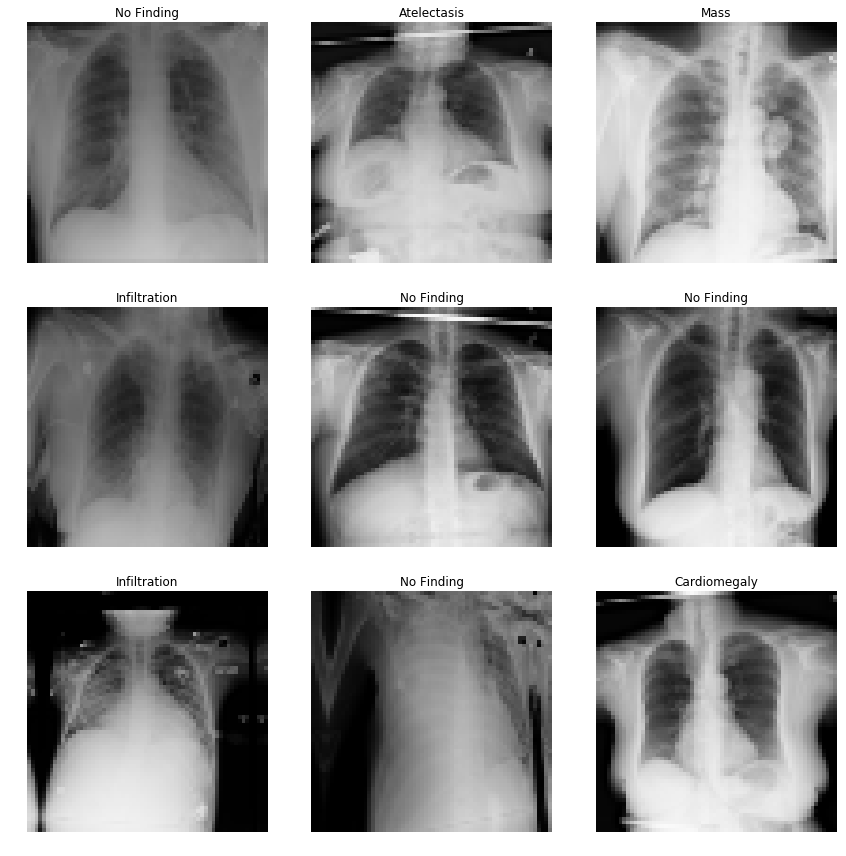

In [27]:
db_xrays.show_batch(3)

In [28]:
model = create_cnn(data=db_xrays, 
                   arch=models.resnet18, 
                   metrics=[accuracy])

In [ ]:
model.lr_find()

epoch,train_loss,valid_loss,accuracy


Min numerical gradient: 2.29E-02


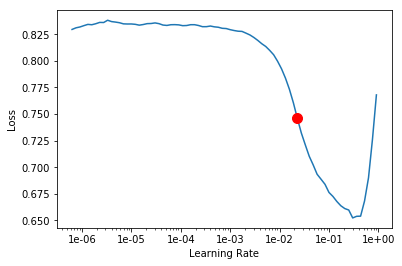

In [16]:
model.recorder.plot()

In [ ]:
model.fit_one_cycle(cyc_len=5, max_lr=2.2e-2)